1. En base a la descripción del caso, plantear el objetivo de machine learning. (1 punto)
    * El objetivo es ver si el cliente le da de baja o no a su tarjeta de credito, basandose en sus caracteristicas

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Leer el archivo CSV original con delimitador ';'
data = pd.read_csv('peru_bank.csv', delimiter=';')

# Función para agregar comillas solo a los valores de tipo string
def quote_values(val):
    if isinstance(val, str):  # Si el valor es un string, agregar comillas
        return f'{val}'
    return val  # Si no, devolver el valor tal cual (números y otros tipos permanecen sin cambios)

# Aplicar la función a las columnas categóricas
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].apply(quote_values)

# Guardar el DataFrame en un nuevo archivo CSV con ',' como delimitador
data.to_csv('peru_bank.csv', sep=',', index=False, header=True, quoting=1)  # quoting=1 para agregar comillas a los strings

2. Realizar  un  análisis  de  identificación y  tratamiento  de  valores  faltantes. Presentar  sus 
conclusiones. (1 punto)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 3254 non-null   int64  
 1   Target                    3254 non-null   int64  
 2   Customer_Age              3254 non-null   int64  
 3   Gender                    3254 non-null   object 
 4   Dependent_count           3254 non-null   int64  
 5   Education_Level           3254 non-null   object 
 6   Marital_Status            3254 non-null   object 
 7   Income_Category           3254 non-null   object 
 8   Card_Category             3254 non-null   object 
 9   Months_on_book            3254 non-null   int64  
 10  Total_Relationship_Count  3254 non-null   int64  
 11  Months_Inactive_12_mon    3254 non-null   int64  
 12  Contacts_Count_12_mon     3254 non-null   int64  
 13  Credit_Limit              3254 non-null   float64
 14  Total_Re

In [51]:
data.head()

,CLIENTNUM,Target,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Flag_Muestra
0,708082083,0,45,F,3,High School,Married,Less than $40K,Blue,36,4,3,3,3544.0,1661,1883.0,15149,111,0.469,1
1,708083283,1,58,M,0,Unknown,Single,$40K - $60K,Blue,45,3,1,3,3421.0,2517,904.0,992,21,0.736,1
2,708084558,1,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,6,3,3,8258.0,1771,6487.0,1447,23,0.214,1
3,708098133,0,32,F,0,Graduate,Married,Less than $40K,Blue,19,6,1,0,2834.0,1418,1416.0,1598,39,0.500,1
4,708103608,0,52,M,1,High School,Single,$60K - $80K,Blue,45,1,5,1,11898.0,2517,9381.0,15798,128,0.212,1


In [52]:
data.describe()

,CLIENTNUM,Target,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Flag_Muestra
count,3.254000e+03,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000
mean,7.376497e+08,0.500000,46.371235,2.378304,36.052243,3.613092,2.476644,2.658267,8426.016872,972.857406,7453.159465,3792.009834,56.392747,0.234392,0.799017
std,3.655614e+07,0.500077,7.852928,1.289284,7.910293,1.570544,0.969204,1.140053,9087.977010,894.224310,9103.994080,2942.864547,22.157084,0.280416,0.400797
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000,0.000000
25%,7.126538e+08,0.000000,41.000000,1.000000,32.000000,2.000000,2.000000,2.000000,2404.000000,0.000000,1438.300000,2017.750000,40.000000,0.000000,1.000000
50%,7.172702e+08,0.500000,46.000000,2.000000,36.000000,4.000000,3.000000,3.000000,4345.000000,948.000000,3457.000000,2683.000000,52.000000,0.100000,1.000000
75%,7.718578e+08,1.000000,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,10601.500000,1709.750000,9595.000000,4534.750000,73.000000,0.430750,1.000000
max,8.282949e+08,1.000000,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,17258.000000,134.000000,0.999000,1.000000


In [53]:
data.isnull().sum()

CLIENTNUM                   0
Target                      0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
Flag_Muestra                0
dtype: int64

   *   Como no existen datos nulos, no se tienen que hacer limpiaza ni reemplazos
 

In [54]:
# SI HUBIERAN DATOS NULOS
# Reemplazar valores faltantes en columnas numéricas con la media
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Reemplazar valores faltantes en columnas categóricas con la moda
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\magic\AppData\Local\Temp\ipykernel_50820\3294405437.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\magic\AppData\Local\Temp\ipykernel_50820\3294405437.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

3. Según corresponda, realizar un análisis descriptivo haciendo uso del gráfico de boxplot 
entre el target y las variables. Presentar sus conclusiones. (1 punto)

In [55]:
numeric = data.select_dtypes(include=['int64', 'float64']).drop(['Flag_Muestra', 'Target'], axis=1)
categoric = data.select_dtypes(include=['object'])

<Figure size 1600x1000 with 0 Axes>

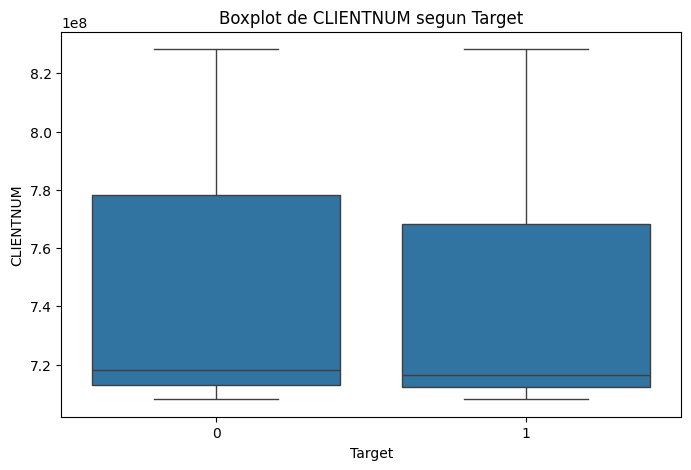

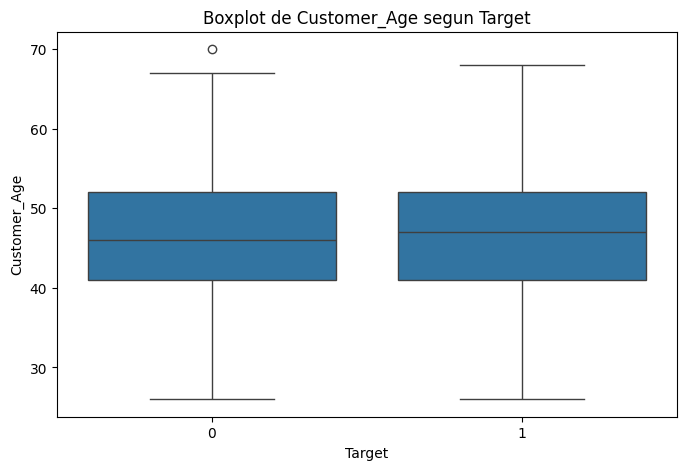

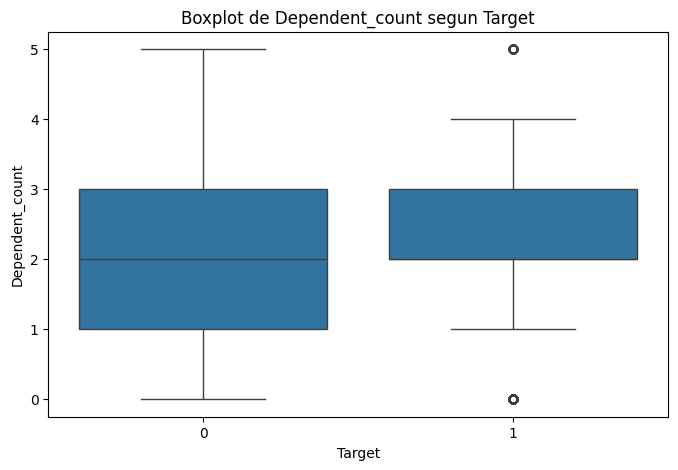

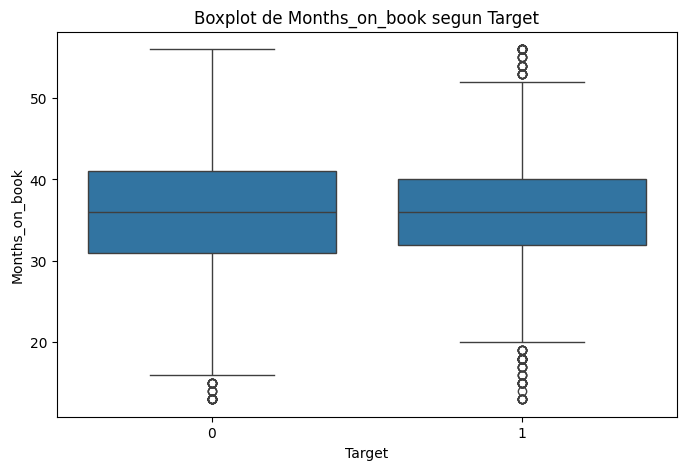

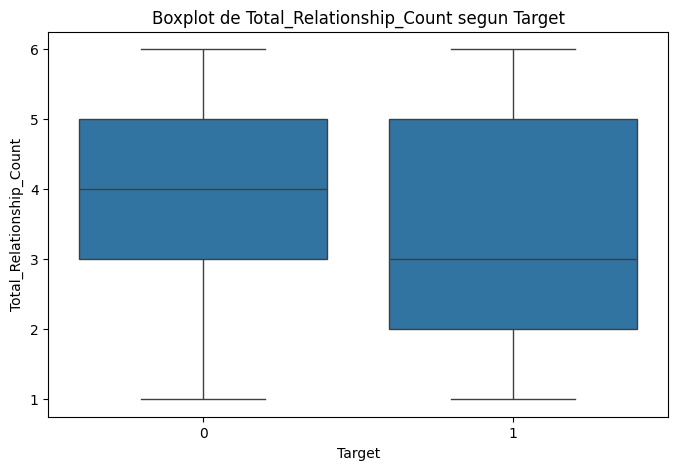

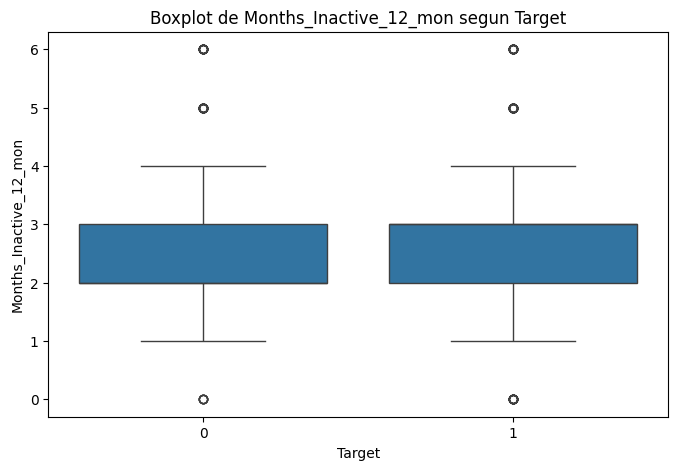

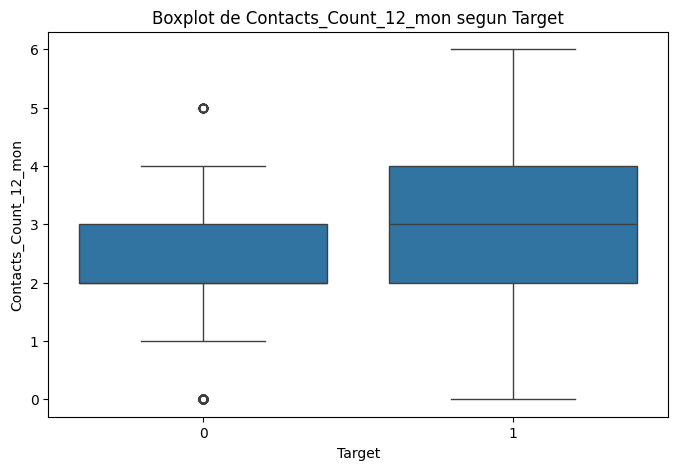

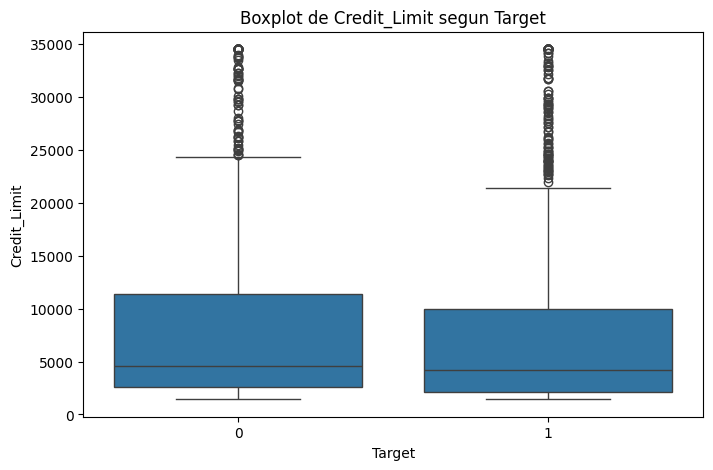

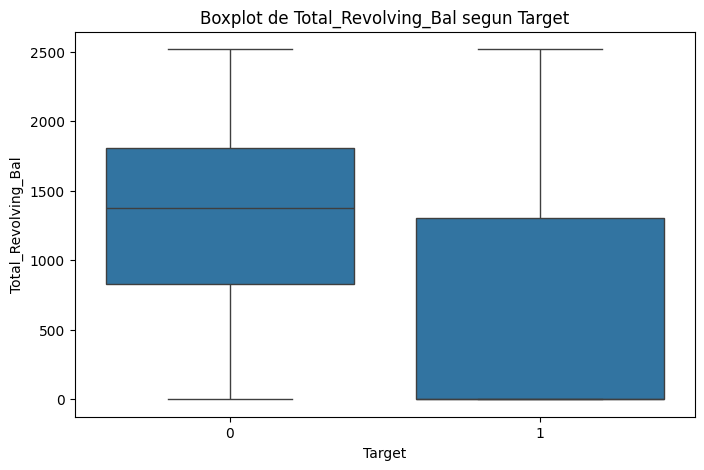

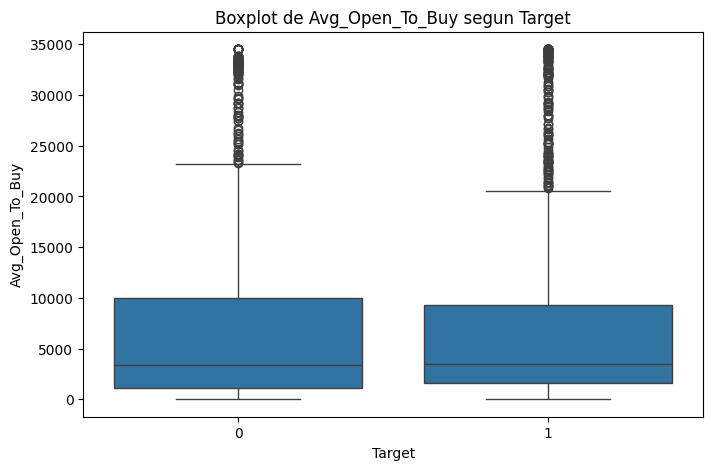

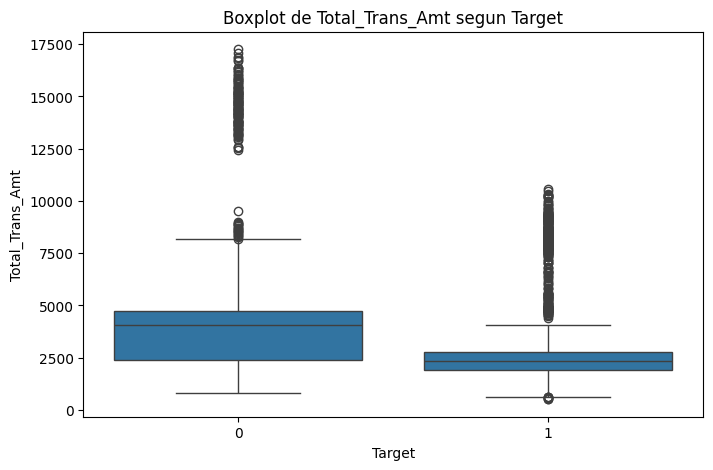

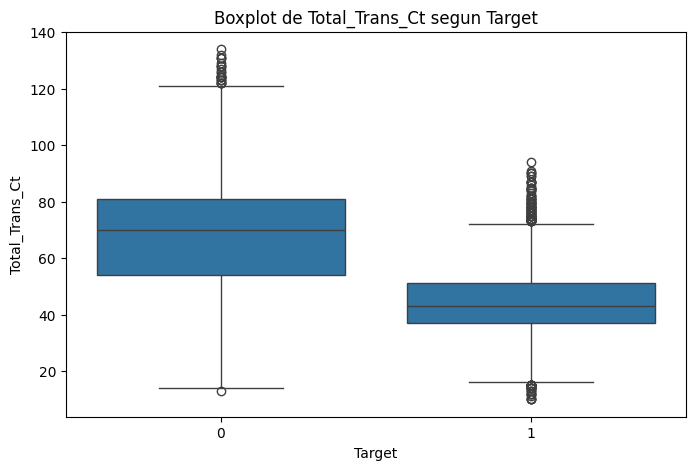

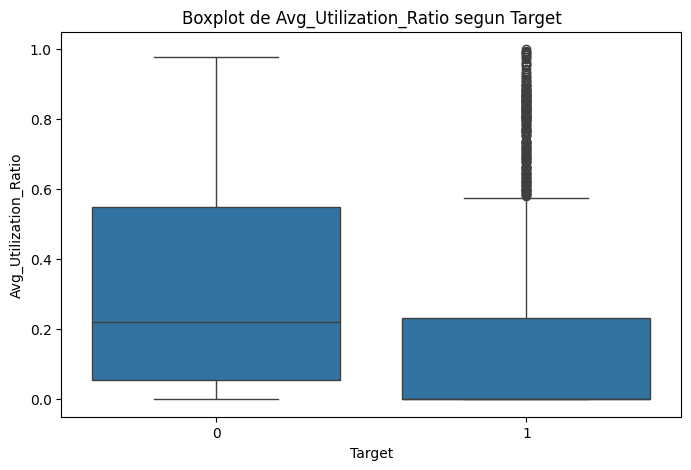

In [56]:
plt.figure(figsize=(16, 10))
for col in numeric:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x = 'Target', y = col, data = data)
    plt.title(f'Boxplot de {col} segun Target')
    plt.show()

4. Según corresponda, realizar un análisis descriptivo haciendo uso de un gráfico de barras 
al 100% apilado entre el target y las variables. Presentar sus conclusiones

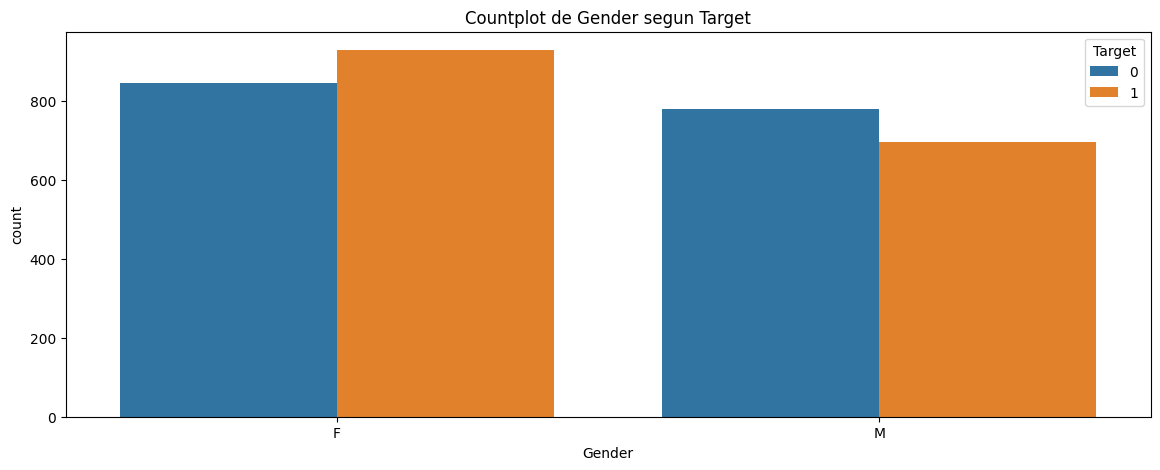

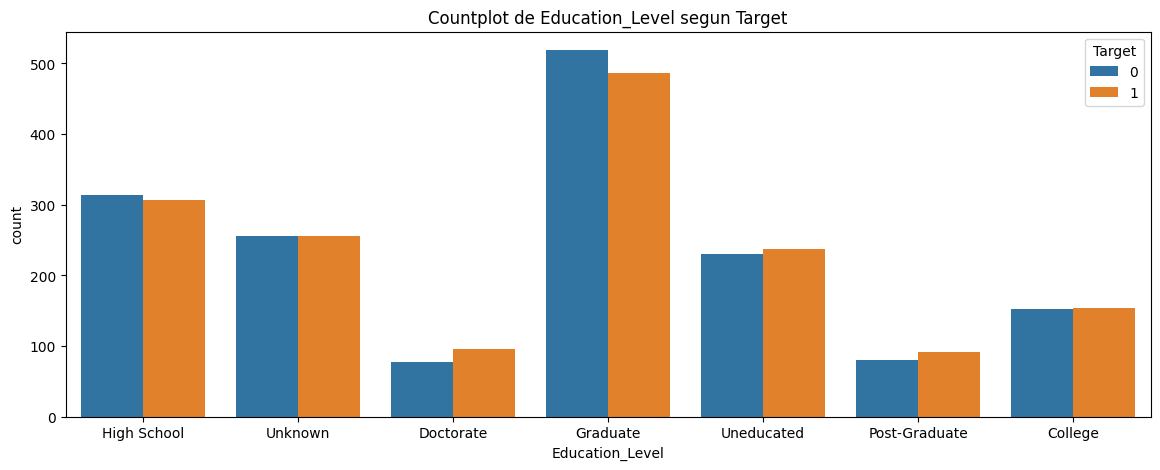

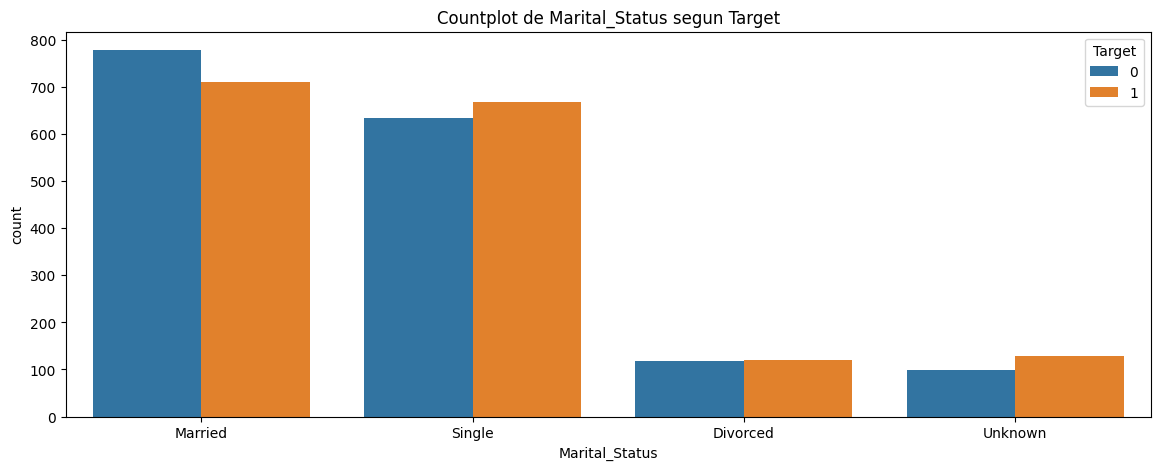

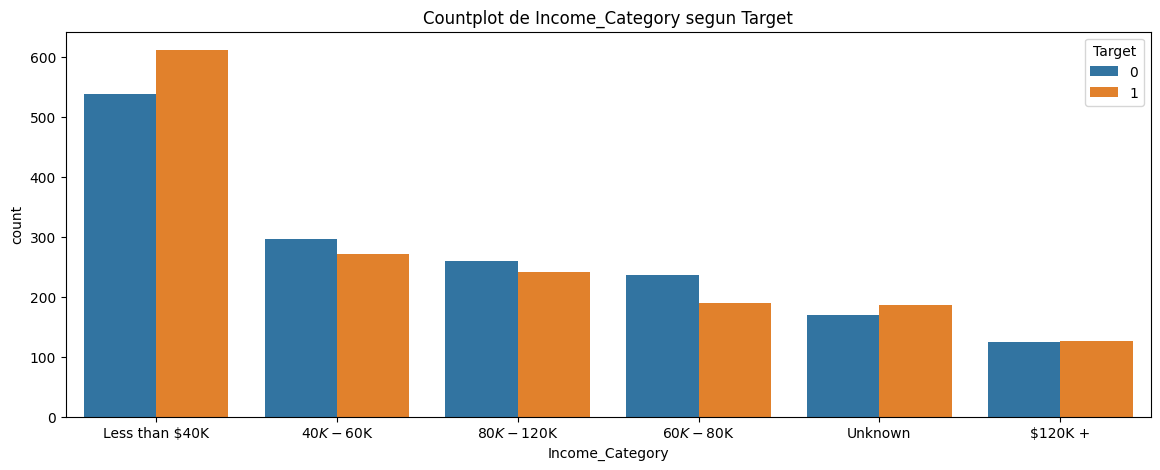

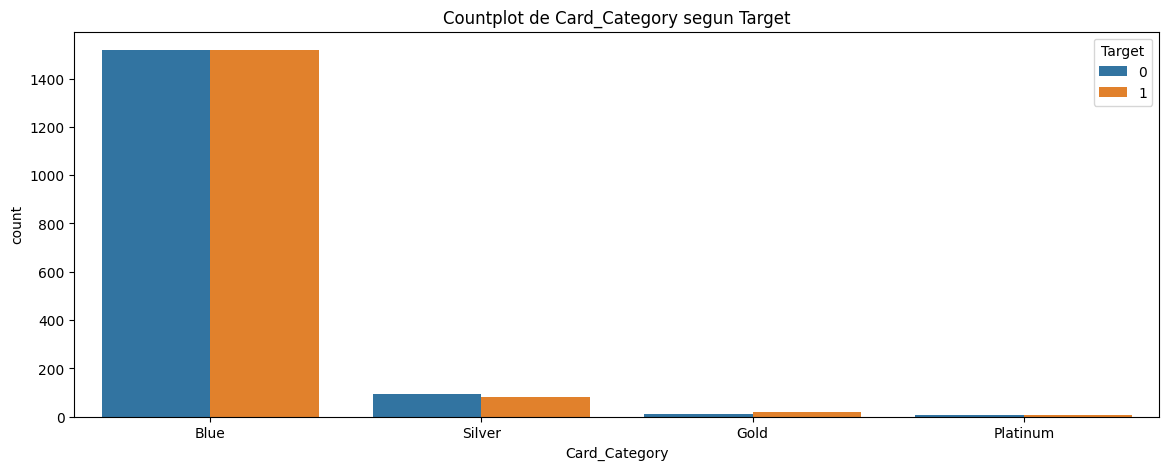

In [57]:
for col in categoric:
    plt.figure(figsize=(14, 5))
    sns.countplot(x = col, hue = 'Target', data = data)
    plt.title(f'Countplot de {col} segun Target')
    plt.show()

5. Haciendo uso del modelo de Machine Learning KNN, programar y presentar una función 
para determinar el “K” más adecuado en función al AUC. La función debe presentar de 
manera  gráfica  en  el  eje  vertical  los  distintos  valores  de  AUC  y  en  el  eje  horizontal  lo 
distintos valores de “K” (entre 1 y 30), así como el valor de “K” más adecuado. Presentar 
sus conclusiones

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [59]:
data['Target'].dtype

dtype('int64')

In [60]:
X = data.drop(['Flag_Muestra', 'Target'], axis=1)
y = data['Target']

In [61]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Convertimos las variables categoricas en numericas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.fit_transform(X_test[col])

In [63]:
# Normalizamos la data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

K=1, AUC=0.7813
K=2, AUC=0.8331
K=3, AUC=0.8655
K=4, AUC=0.8794
K=5, AUC=0.8815
K=6, AUC=0.8880
K=7, AUC=0.8901
K=8, AUC=0.8942
K=9, AUC=0.8982
K=10, AUC=0.9009
K=11, AUC=0.8994
K=12, AUC=0.9015
K=13, AUC=0.9045
K=14, AUC=0.9042
K=15, AUC=0.9032
K=16, AUC=0.9037
K=17, AUC=0.9042
K=18, AUC=0.9044
K=19, AUC=0.9056
K=20, AUC=0.9061
K=21, AUC=0.9062
K=22, AUC=0.9061
K=23, AUC=0.9055
K=24, AUC=0.9048
K=25, AUC=0.9044
K=26, AUC=0.9050
K=27, AUC=0.9057
K=28, AUC=0.9062
K=29, AUC=0.9050
K=30, AUC=0.9054


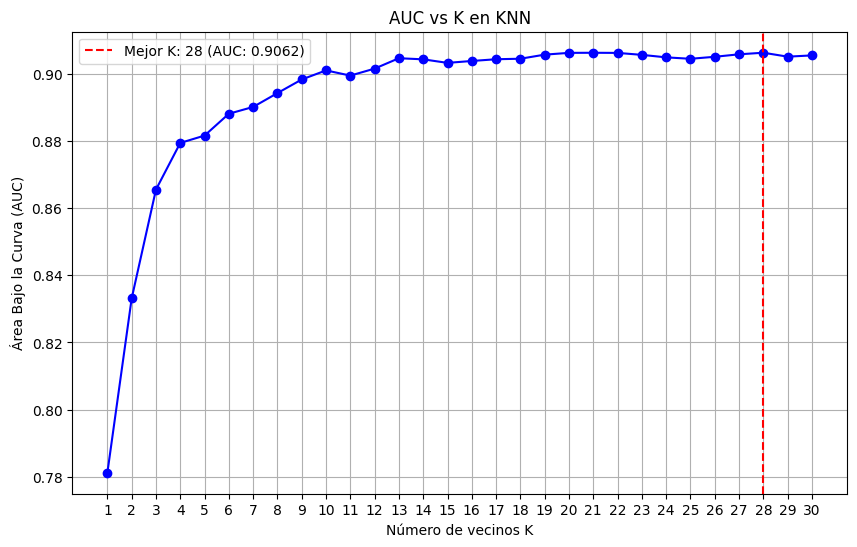


El mejor K es 28 con un AUC de 0.9062.


In [64]:
def optimal_k_knn(X_train, y_train, X_test, y_test, max_k=30):
    auc_scores = []

    # Probar diferentes valores de K
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_proba = knn.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
        auc = roc_auc_score(y_test, y_proba)
        auc_scores.append(auc)
        print(f"K={k}, AUC={auc:.4f}")

    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), auc_scores, marker='o', linestyle='-', color='b')
    plt.title('AUC vs K en KNN')
    plt.xlabel('Número de vecinos K')
    plt.ylabel('Área Bajo la Curva (AUC)')
    plt.xticks(np.arange(1, max_k + 1, step=1))
    plt.grid()
    
    # Mejor K
    best_k = np.argmax(auc_scores) + 1
    best_auc = max(auc_scores)
    plt.axvline(x=best_k, color='r', linestyle='--', label=f'Mejor K: {best_k} (AUC: {best_auc:.4f})')
    plt.legend()
    plt.show()

    return best_k, best_auc

# Ejecutar la función
best_k, best_auc = optimal_k_knn(X_train, y_train, X_test, y_test)
print(f'\nEl mejor K es {best_k} con un AUC de {best_auc:.4f}.')


6. Programar  una  función  para  presentar  en  una  sola  gráfica  la  curva  ROC  (Receiver 
Operating  Characteristic)  haciendo  uso  de  los  modelos  de  Machine  Learning  Naive 
Bayes, KNN y Redes Neuronales Artificiales (como mínimo Perceptron) . Presentar sus 
conclusiones. (3 puntos)

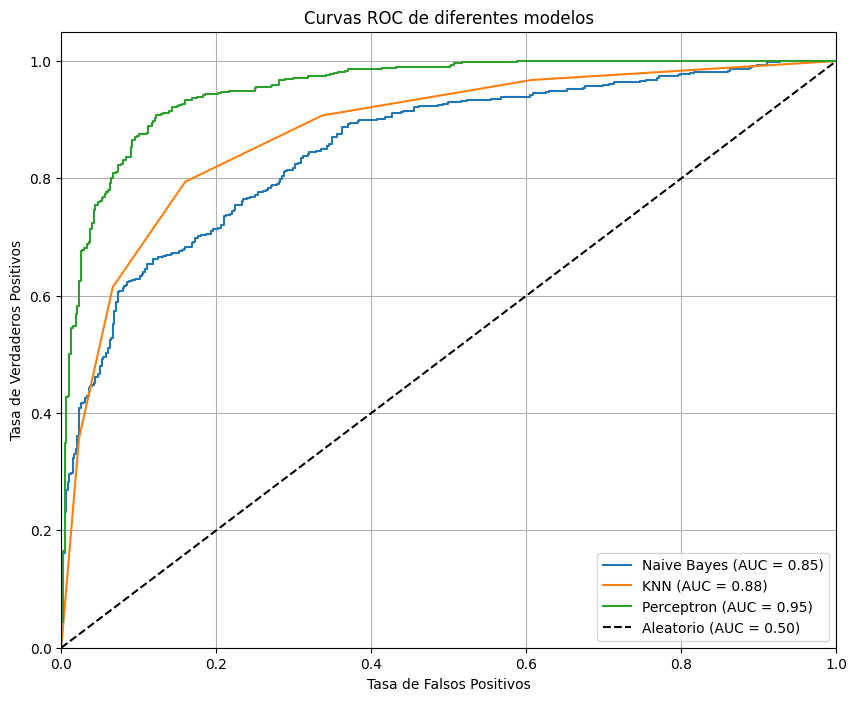

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler



def plot_roc_curve(X_train, y_train, X_test, y_test):
    models = {
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Perceptron': MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
    }

    plt.figure(figsize=(10, 8))

    for model_name, model in models.items():
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Predecir las probabilidades
        y_proba = model.predict_proba(X_test)[:, 1]
        
        # Calcular la curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        # Graficar la curva ROC
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Graficar la línea diagonal (caso aleatorio)
    plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.50)')
    
    # Configuraciones de la gráfica
    plt.title('Curvas ROC de diferentes modelos')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.legend(loc="lower right")
    plt.show()

# Ejecutar la función
plot_roc_curve(X_train, y_train, X_test, y_test)
